In [1]:
from google.colab import files
from zipfile import ZipFile

# Upload your local zip (the "archive.zip" you showed which has lfw-deepfunneled inside)
uploaded = files.upload()

# Unzip
with ZipFile("archive.zip", "r") as zip_ref:
    zip_ref.extractall("lfw_data")

print("Extracted!")


KeyboardInterrupt: 

In [2]:
from zipfile import ZipFile

# Unzip your uploaded archive.zip into lfw_data/
with ZipFile("archive.zip", "r") as zip_ref:
    zip_ref.extractall("lfw_data")

print("✅ Extracted into lfw_data/")


✅ Extracted into lfw_data/


In [3]:
import os
import glob
import cv2                # for image loading & resizing
import numpy as np        # for numerical arrays
import matplotlib.pyplot as plt  # for plotting
base_dir = "lfw_data/lfw-deepfunneled/lfw-deepfunneled"



In [4]:
import os, glob, cv2
import numpy as np

base_dir = "lfw_data/lfw-deepfunneled/lfw-deepfunneled"
IMG_SIZE = (160, 160)
images, labels = [], []

for person in os.listdir(base_dir):
    folder = os.path.join(base_dir, person)
    if os.path.isdir(folder):
        for img_path in glob.glob(os.path.join(folder, "*")):
            img = cv2.imread(img_path)
            if img is None:
                continue
            img = cv2.resize(img, IMG_SIZE)
            img = img.astype('float32') / 255.0
            images.append(img)
            labels.append(person)

X = np.array(images)
y = np.array(labels)

print("✅ Data loaded")
print("Images shape:", X.shape)
print("Labels shape:", y.shape)
print("Unique identities:", len(np.unique(y)))


✅ Data loaded
Images shape: (13233, 160, 160, 3)
Labels shape: (13233,)
Unique identities: 5749


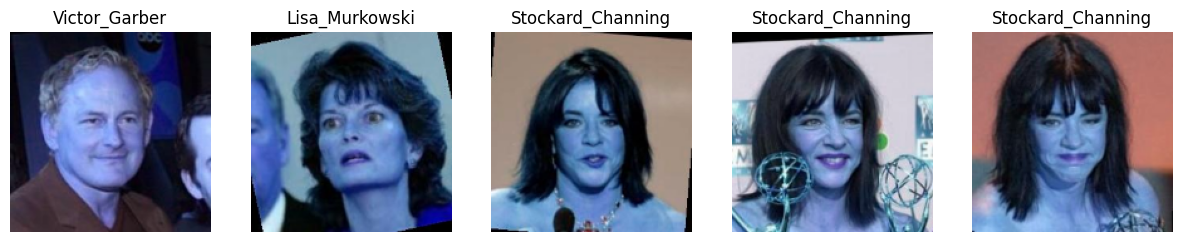

In [5]:
fig, ax = plt.subplots(1, 5, figsize=(15,5))
for i in range(5):
    ax[i].imshow(X[i])
    ax[i].set_title(y[i])
    ax[i].axis("off")
plt.show()
